<a href="https://colab.research.google.com/github/tejas2008/Tubercolosis-detection/blob/master/tb_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/IA1Dataset'

In [ ]:
%ls

affected/  normal/


In [ ]:
import os
import cv2
import random
import numpy as np


Augmentation

In [ ]:
# Horizontal Shift
def horizontal_shift(img_passed):
    ratio = 0.7
    img = cv2.imread(img_passed)
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    return img


In [ ]:
# Vertical Shift

def vertical_shift(img_passed):
    ratio = 0.7 
    img = cv2.imread(img_passed)
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :,:]
    if ratio < 0:
        img = img[int(-1*to_shift):, :,:]
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    return img

In [ ]:
# Brightness

def brightness(img_passed):
    low = 0.5
    high = 3
    img = cv2.imread(img_passed)
    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    return img

In [ ]:
# Zoom

def zoom(img_passed):
    value = 0.5
    img = cv2.imread(img_passed)
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    return img

In [ ]:
# horizontal flip
def horizontal_flip(img_passed):
  img = cv2.imread(img_passed)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(100,100))
  return cv2.flip(img, 1)


In [ ]:
# vertical flip
def vertical_flip(img_passed):
    img = cv2.imread(img_passed)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    return cv2.flip(img, 0)
    

In [ ]:
# rotation
def rotation(img_passed):
    img = cv2.imread(img_passed)
    angle = 30
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    return img


In [ ]:
from google.colab.patches import cv2_imshow
# i = vertical_flip('/content/drive/My Drive/IA1Dataset/affected/CHNCXR_0327_1.png')
# print(i)
# cv2_imshow(i)
# print(i.shape)
category = ['affected','normal']
data = []
for c in category:
  path = '/content/drive/My Drive/IA1Dataset/'+c
  target = category.index(c)
  for img in os.listdir(path):
      try:
        img_hshifted = horizontal_shift(os.path.join(path,img))
        data.append([img_hshifted,target])
      except Exception as e:
        print(e)
print(len(data))


449


In [ ]:
category = ['affected','normal']
for c in category:
  path = '/content/drive/My Drive/IA1Dataset/'+c
  target = category.index(c)
  for img in os.listdir(path):
      try:
        img_vshifted = vertical_shift(os.path.join(path,img))
        data.append([img_vshifted,target])
      except Exception as e:
        print(e)
print(len(data))


898


In [ ]:
category = ['affected','normal']
for c in category:
  path = '/content/drive/My Drive/IA1Dataset/'+c
  target = category.index(c)
  for img in os.listdir(path):
      try:
        img_bright = brightness(os.path.join(path,img))
        data.append([img_bright,target])
      except Exception as e:
        print(e)
print(len(data))

1347


In [ ]:
category = ['affected','normal']
for c in category:
  path = '/content/drive/My Drive/IA1Dataset/'+c
  target = category.index(c)
  for img in os.listdir(path):
      try:
        img_zoomed = zoom(os.path.join(path,img))
        data.append([img_zoomed,target])
      except Exception as e:
        print(e)
print(len(data))

1796


In [ ]:
category = ['affected','normal']
for c in category:
  path = '/content/drive/My Drive/IA1Dataset/'+c
  target = category.index(c)
  for img in os.listdir(path):
      try:
        img_hflipped = horizontal_flip(os.path.join(path,img))
        data.append([img_hflipped,target])
      except Exception as e:
        print(e)
print(len(data))

2245


In [ ]:
category = ['affected','normal']
for c in category:
  path = '/content/drive/My Drive/IA1Dataset/'+c
  target = category.index(c)
  for img in os.listdir(path):
      try:
        img_vflipped = vertical_flip(os.path.join(path,img))
        data.append([img_vflipped,target])
      except Exception as e:
        print(e)
print(len(data))

2694


In [ ]:
category = ['affected','normal']
for c in category:
  path = '/content/drive/My Drive/IA1Dataset/'+c
  target = category.index(c)
  for img in os.listdir(path):
      try:
        img_rotated = rotation(os.path.join(path,img))
        data.append([img_rotated,target])
      except Exception as e:
        print(e)
print(len(data))

3143


In [ ]:

category = ['affected','normal']
for c in category:
    path = '/content/drive/My Drive/IA1Dataset/'+c
    target = category.index(c)
    for img in os.listdir(path):
        try:
            img_array1 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img_array1 = cv2.resize(img_array1,(100,100))
            data.append([new_img_array1,target])
        except Exception as e:
          print(e)
          break
print(len(data))

3592


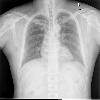

In [ ]:
cv2_imshow(data[2209][0])

In [ ]:
from sklearn.model_selection import train_test_split
random.shuffle(data)
x=[]
y=[]
for features,labels in data:
    x.append(features)
    y.append(labels)   
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten ,Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
x_train=np.array(x_train).reshape(-1,100,100,1)
x_train=tf.keras.utils.normalize(x_train,axis=1)
y_train=np.array(y_train)
# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
print(x_train.shape)
print(y_train.shape)

(2514, 100, 100, 1)
(2514,)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.fit(x_train,y_train,epochs=3)
results = model.evaluate(np.array(x_test).reshape(-1,100,100,1), np.array(y_test))
print("test loss, test acc:", results)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6400)             

In [ ]:
predictions = model.predict(np.array(x_test).reshape(-1,100,100,1))
tf.math.confusion_matrix( np.array(y_test),predictions)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)
results = model.evaluate(np.array(x_test).reshape(-1,100,100,1), np.array(y_test))
print("test loss, test acc:", results)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 21, 21, 32)        18464     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 32)         

Without Augmentation

In [ ]:
l = []
category = ['affected','normal']
for c in category:
    path = '/content/drive/My Drive/IA1Dataset/'+c
    target = category.index(c)
    for img in os.listdir(path):
        try:
            img_array1 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img_array1 = cv2.resize(img_array1,(100,100))
            l.append([new_img_array1,target])
        except Exception as e:
          print(e)
          break
print(len(l))

449


In [ ]:
from sklearn.model_selection import train_test_split
random.shuffle(l)
x=[]
y=[]
for features,labels in l:
    x.append(features)
    y.append(labels)   
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten ,Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
x_train=np.array(x_train).reshape(-1,100,100,1)
x_train=tf.keras.utils.normalize(x_train,axis=1)
y_train=np.array(y_train)
# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
print(x_train.shape)
print(y_train.shape)

(314, 100, 100, 1)
(314,)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.fit(x_train,y_train,epochs=3)
results = model.evaluate(np.array(x_test).reshape(-1,100,100,1), np.array(y_test))
print("test loss, test acc:", results)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6400)             

In [ ]:
predictions = model.predict(np.array(x_test).reshape(-1,100,100,1))
print(predictions[:10])
tf.math.confusion_matrix( np.array(y_test),predictions)

Augmenting only positive TB x-rays


In [ ]:
from google.colab.patches import cv2_imshow
# i = vertical_flip('/content/drive/My Drive/IA1Dataset/affected/CHNCXR_0327_1.png')
# print(i)
# cv2_imshow(i)
# print(i.shape)
# category = ['affected','normal']
a = []
for c in category:
  path = '/content/drive/My Drive/IA1Dataset/affected'
  target = 0
  for img in os.listdir(path):
      try:
        img_hshifted = horizontal_shift(os.path.join(path,img))
        a.append([img_hshifted,target])
        img_vshifted = vertical_shift(os.path.join(path,img))
        a.append([img_vshifted,target])
        img_hflipped = horizontal_flip(os.path.join(path,img))
        a.append([img_hflipped,target])
        img_vflipped  = vertical_flip(os.path.join(path,img))
        a.append([img_vflipped ,target])
        img_bright = brightness(os.path.join(path,img))
        a.append([img_bright,target])
        img_zoomed = zoom(os.path.join(path,img))
        a.append([img_zoomed,target])
        img_rotated = rotation(os.path.join(path,img))
        a.append([img_rotated,target])
      except Exception as e:
        print(e)
        break


In [ ]:
len(a)

602

In [ ]:
category = ['affected','normal']
for c in category:
    path = '/content/drive/My Drive/IA1Dataset/'+c
    target = category.index(c)
    for img in os.listdir(path):
        try:
            img_array3 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img_array3 = cv2.resize(img_array3,(100,100))
            a.append([new_img_array3,target])
        except Exception as e:
          print(e)
          break
print(len(a))

1051


In [ ]:
from sklearn.model_selection import train_test_split
random.shuffle(a)
x=[]
y=[]
for features,labels in a:
    x.append(features)
    y.append(labels)   
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten ,Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
x_train=np.array(x_train).reshape(-1,100,100,1)
x_train=tf.keras.utils.normalize(x_train,axis=1)
y_train=np.array(y_train)
# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
print(x_train.shape)
print(y_train.shape)

(735, 100, 100, 1)
(735,)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.fit(x_train,y_train,epochs=25)
results = model.evaluate(np.array(x_test).reshape(-1,100,100,1), np.array(y_test))
print("test loss, test acc:", results)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 6400)            

In [ ]:
predictions = model.predict(np.array(x_test).reshape(-1,100,100,1))
print(predictions[:10])
tf.math.confusion_matrix( np.array(y_test),predictions)